In [1]:
# importer les packages necessaires
import numpy as np # algebre lineaire
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd # data processing, 
ran=pd.read_csv("C:/Users/PC/Downloads/ransomware/ran/data_file.csv", on_bad_lines="skip")

In [3]:
ran

,FileName,md5Hash,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses,Benign
0,0124e21d-018c-4ce0-92a3-b9e205a76bc0.dll,79755c51e413ed3c6be4635fd729a6e1,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0,1
1,05c8318f98a5d301d80000009c316005.vertdll.dll,95e19f3657d34a432eada93221b0ea16,34404,84,121728,10,10,126576,4930,0,14,10,8,262144,16864,1024,0,1
2,06054fba-5619-4a86-a861-ffb0464bef5d.dll,85c32641d77a54e19ba8ea4ab305c791,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0,1
3,075822ac99a5d301660400009c316005.adhapi.dll,62e3b959d982ef534b66f819fe15f085,34404,84,19904,10,10,21312,252,18160,14,10,6,262144,16736,1040,0,1
4,090607dd9ba5d301ca0900009c316005.SensorsNative...,ae38c5f7d313ad0ff3bfb8826476767f,34404,84,97728,10,10,105792,1852,70592,14,10,7,262144,16736,1096,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62480,VirusShare_a43ceb5e5fffc793e0205d15a0606cb0,a43ceb5e5fffc793e0205d15a0606cb0,332,0,0,1,4,0,0,4096,6,0,3,1048576,0,23504,0,0
62481,VirusShare_0190dafc8304111a00fccf57340ea6a4,0190dafc8304111a00fccf57340ea6a4,332,0,0,7,10,0,0,0,7,0,7,1048576,0,15704,0,0
62482,VirusShare_0f3ca55979aaf59158d6b01140696e44,0f3ca55979aaf59158d6b01140696e44,332,0,0,0,4,0,0,404908,2,50,11,1048576,0,2364,0,0
62483,VirusShare_fca5ce35f1690db6babca5aa5d559535,fca5ce35f1690db6babca5aa5d559535,332,0,0,0,4,14448,70,4096,8,0,4,1048576,0,130296,0,0


In [4]:
#se debarrasser des caractéristiques qui sont toutes à 0
ran_new = ran.loc[:, (ran != 0).any(axis=0)]
ran_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62485 entries, 0 to 62484
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   FileName            62485 non-null  object
 1   md5Hash             62485 non-null  object
 2   Machine             62485 non-null  int64 
 3   DebugSize           62485 non-null  int64 
 4   DebugRVA            62485 non-null  int64 
 5   MajorImageVersion   62485 non-null  int64 
 6   MajorOSVersion      62485 non-null  int64 
 7   ExportRVA           62485 non-null  int64 
 8   ExportSize          62485 non-null  int64 
 9   IatVRA              62485 non-null  int64 
 10  MajorLinkerVersion  62485 non-null  int64 
 11  MinorLinkerVersion  62485 non-null  int64 
 12  NumberOfSections    62485 non-null  int64 
 13  SizeOfStackReserve  62485 non-null  int64 
 14  DllCharacteristics  62485 non-null  int64 
 15  ResourceSize        62485 non-null  int64 
 16  BitcoinAddresses    62

In [5]:
#sélectionne jusqu'à l'avant-dernière colonne du cadre de données
x = ran_new.iloc[:, :-1].values
#vecteur ligne des valeurs de la dernière colonne,
y = ran_new.iloc[:,-1].values

In [6]:
# Vérification de la forme des caractéristiques d'entrée et de sortie
print('Forme des caractéristiques d entrée:', x.shape)
print('Forme des caractéristiques de sortie:', y.shape)

Forme des caractéristiques d entrée: (62485, 17)
Forme des caractéristiques de sortie: (62485,)


In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

#Vérification de la forme des ensembles de formation et de test
print('Forme des données d entrée pour l entrainement:', x_train.shape)
print('Forme des données de sortie de l apprentissage:', y_train.shape)
print('Forme des données d\'entrée du test:', x_test.shape)
print('Forme des données de sortie du test:', y_test.shape)

Forme des données d entrée pour l entrainement: (56236, 17)
Forme des données de sortie de l apprentissage: (56236,)
Forme des données d'entrée du test: (6249, 17)
Forme des données de sortie du test: (6249,)


In [8]:
#sélectionne jusqu'à l'avant-dernière colonne du cadre de données en eliminant les 2 premieres colonnes
x = ran_new.iloc[:, 2:-1]
x

,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses
0,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0
1,34404,84,121728,10,10,126576,4930,0,14,10,8,262144,16864,1024,0
2,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0
3,34404,84,19904,10,10,21312,252,18160,14,10,6,262144,16736,1040,0
4,34404,84,97728,10,10,105792,1852,70592,14,10,7,262144,16736,1096,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62480,332,0,0,1,4,0,0,4096,6,0,3,1048576,0,23504,0
62481,332,0,0,7,10,0,0,0,7,0,7,1048576,0,15704,0
62482,332,0,0,0,4,0,0,404908,2,50,11,1048576,0,2364,0
62483,332,0,0,0,4,14448,70,4096,8,0,4,1048576,0,130296,0


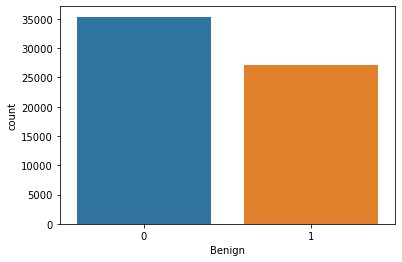

In [9]:
sns.countplot(data=ran, x='Benign')
plt.show()

<AxesSubplot:>

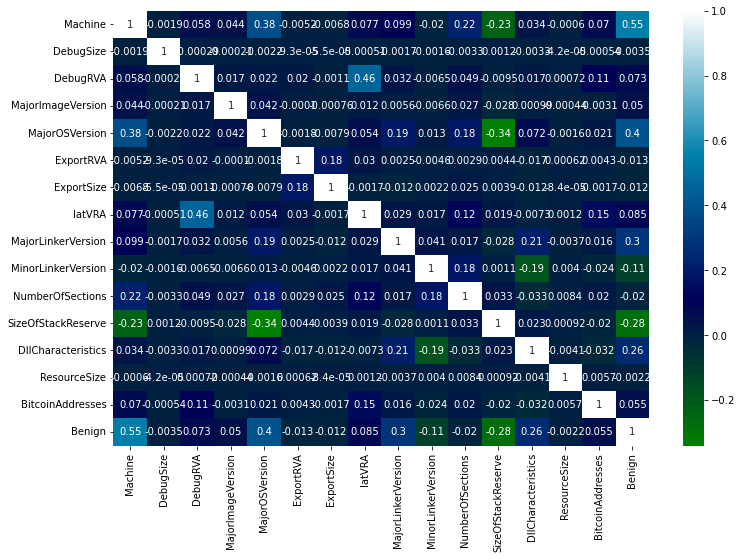

In [10]:
#Matrice de corrélation en utilisant Seaborn
plt.figure(figsize=(12,8))
sns.heatmap(ran.corr(),annot = True,cmap='ocean')

In [11]:
x = ran_new.iloc[:, 2:-1].values
y = ran_new.iloc[:,-1].values

In [12]:
type(x)

numpy.ndarray

In [13]:
x

array([[   332,      0,      0, ...,  34112,    672,      0],
       [ 34404,     84, 121728, ...,  16864,   1024,      0],
       [   332,      0,      0, ...,  34112,    672,      0],
       ...,
       [   332,      0,      0, ...,      0,   2364,      0],
       [   332,      0,      0, ...,      0, 130296,      0],
       [   332,      0,      0, ...,      0,   6912,      0]], dtype=int64)

In [17]:
# Diviser l'ensemble de données en test et train
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,accuracy_score,plot_confusion_matrix,auc,confusion_matrix
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [ ]:
#construisons les 7 modeles

In [ ]:
# I/        RF

In [ ]:
# construction de modèles Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clasif=RandomForestClassifier(max_depth=2, random_state=0)
randomModel=clasif.fit(x_train, y_train)

In [ ]:
#Evaluation de la forêt aléatoire sur le test
from sklearn.metrics import f1_score,accuracy_score,plot_confusion_matrix,auc,confusion_matrix
# precision sur le dataset de test
prediction=randomModel.predict(x_test)

accuracy_score(y_test,prediction)*100

In [ ]:
#matrice de confusion (vrais positifs, faux positifs, faux négatifs et vrais négatifs)
cm = confusion_matrix(y_test, prediction)
sns.heatmap(cm, annot=True)

In [ ]:
# afficher les false positive et false negative
print("falses positives:", cm[0][1]/sum(cm[0])*100)
print("falses negatives:", cm[1][0]/sum(cm[1])*100)

In [ ]:
# Illustre le résultat de la précision
print(metrics.classification_report(y_test, prediction))

In [ ]:
# la fin
preview = pd.DataFrame(data={
    'resultats prevus': prediction,
    'resultats Réel ': y_test
})

preview

In [ ]:
#  II SVM

In [18]:
# construisons le modele support vector machine
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)

In [19]:
# afficher le score
print("le score de l'algorithme svm :", svm.score(x_test, y_test)*100)

le score de l'algorithme svm : 78.59276645684413


<AxesSubplot:>

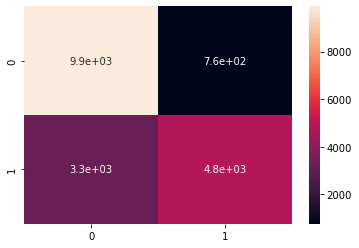

In [20]:
#matrice de confusion (vrais positifs, faux positifs, faux négatifs et vrais négatifs)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True)

In [21]:
# la precision
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.93      0.83     10661
           1       0.86      0.60      0.71      8085

    accuracy                           0.79     18746
   macro avg       0.81      0.76      0.77     18746
weighted avg       0.80      0.79      0.78     18746



In [22]:
# III /       SGD

In [23]:
# appliquons le modele Stochastic gradient descent
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_classification
from sklearn.preprocessing import scale

In [24]:
sgdc = SGDClassifier(max_iter=999, tol=0.05)
sgdc.fit(x_train, y_train)

y_prediction=sgdc.predict(x_train)
print(accuracy_score(y_prediction, y_train ))

0.6520496581997759


In [25]:
# evaluer le modele Stochastic gradient descent sur les donnees a tester
y_pre=sgdc.predict(x_test)
print(accuracy_score(y_pre, y_test ))

0.656139976528326


<AxesSubplot:>

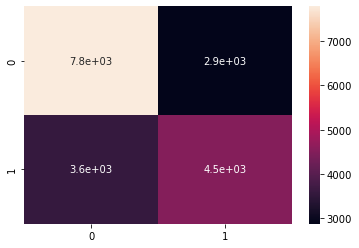

In [26]:
#matrice de confusion (vrais positifs, faux positifs, faux négatifs et vrais négatifs)
cm=confusion_matrix(y_test, y_pre)
sns.heatmap(cm, annot=True)

In [27]:
# la precision
print(metrics.classification_report(y_test, y_pre))

              precision    recall  f1-score   support

           0       0.69      0.73      0.71     10661
           1       0.61      0.56      0.58      8085

    accuracy                           0.66     18746
   macro avg       0.65      0.64      0.65     18746
weighted avg       0.65      0.66      0.65     18746



In [28]:
#  IV  lR

In [29]:
# Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

clasif=LogisticRegression(random_state=2)
logModel=clasif.fit(x_train, y_train)

C:\Users\PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
#calculonl le score sur le dataset test
pred= logModel.predict(x_test)
accuracy_score(y_test,pred)*100

79.5156300010669

<AxesSubplot:>

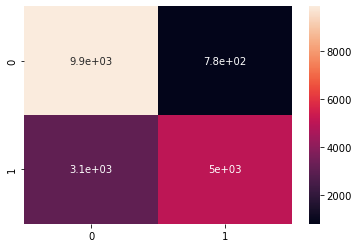

In [32]:
#matrice de confusion (vrais positifs, faux positifs, faux négatifs et vrais négatifs)
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True)

In [33]:
# afficher false positive et false negative
print("falses positives:", cm[0][1]/sum(cm[0])*100)
print("falses negatives:", cm[1][0]/sum(cm[1])*100)

falses positives: 7.3632867460838565
falses negatives: 37.78602350030921


In [34]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.76      0.93      0.84     10661
           1       0.87      0.62      0.72      8085

    accuracy                           0.80     18746
   macro avg       0.81      0.77      0.78     18746
weighted avg       0.81      0.80      0.79     18746



In [35]:
# V      KNN

In [36]:
# KNN CLASSIFIER
#Dans cette étape, le classificateur KNN est appliqué et réparti en deux classes 

In [37]:
from sklearn.neighbors import KNeighborsClassifier
#si k=1 parceque nous avons 2 classes
knn_neigh=KNeighborsClassifier(n_neighbors=1)
knn_neigh.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [38]:
# la prediction sur les donnees a tester
predictt=knn_neigh.predict(x_test)
print(predictt)
# score du KNN Classifier
print("KNN Classifier score:", knn_neigh.score(x_test, y_test)*100)

[1 1 0 ... 0 1 1]
KNN Classifier score: 98.31430705217113


In [39]:
# precision
accuracy_score(y_test,predictt)*100

98.31430705217113

<AxesSubplot:>

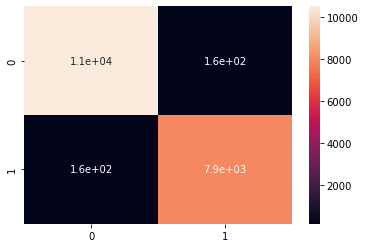

In [40]:
#matrice de confusion (vrais positifs, faux positifs, faux négatifs et vrais négatifs)
cm = confusion_matrix(y_test, predictt)
sns.heatmap(cm, annot=True)

In [41]:
print(metrics.classification_report(y_test, predictt))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     10661
           1       0.98      0.98      0.98      8085

    accuracy                           0.98     18746
   macro avg       0.98      0.98      0.98     18746
weighted avg       0.98      0.98      0.98     18746



In [42]:
# VI  NB

In [43]:
# appliquer le modele de naives bayes 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,classification_report

#creer un classifier Gaussian
classifier=GaussianNB()

In [44]:
classifier.fit(x_train, y_train)

y_pred=classifier.predict(x_train)
print(accuracy_score(y_pred, y_train ))

0.4353323121241912


In [45]:
y_predd=classifier.predict(x_test)
print(accuracy_score(y_pred, y_test ))


ValueError: Found input variables with inconsistent numbers of samples: [43739, 18746]

In [ ]:
#matrice de confusion (vrais positifs, faux positifs, faux négatifs et vrais négatifs)
cm=confusion_matrix(y_test, y_predd)
sns.heatmap(cm, annot=True)

In [ ]:
# accuracy ou precision globale
print(metrics.classification_report(y_test, y_predd))

In [ ]:
# VII MLP

In [ ]:
#nous utilisons le paquet sklearn
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report
scaler= StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
#construisons le model MLP 
MLP=MLPClassifier(hidden_layer_sizes=(14,14,14,14,14,14))

MLP.fit(x_train,y_train)
predictions=MLP.predict(x_test)

In [ ]:
print(predictions)

In [ ]:
#confusion matrix pour notre modele MLP Deep Learning 
cm=confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True)

In [ ]:
# True Negative TN, False Positive FP, False Negatice FN,True Positive TP
print("falses positives:", cm[0][1]/sum(cm[0])*100)
print("falses negatives:", cm[1][0]/sum(cm[1])*100)

In [ ]:
# la precision 
print("Précision de l'apprentissage profond pour la détection des ransomwares:", MLP.score(x_test, y_test)*100)


In [ ]:
print(metrics.classification_report(y_test, predictions))